In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("result.csv")

In [3]:
df

,ParcelID,Latitude,Longitude,Distance
0,17054981,34.4494,-119.254,0.000102
1,17054972,34.4498,-119.257,0.150772
2,17054563,34.4503,-119.258,0.250121
3,17055019,34.4465,-119.251,0.264751
4,17055022,34.4470,-119.250,0.268831
5,17055403,34.4493,-119.249,0.290736
6,17054912,34.4531,-119.250,0.341451
7,17054918,34.4525,-119.249,0.356791
8,17055183,34.4516,-119.248,0.360060
9,17055267,34.4505,-119.248,0.366119


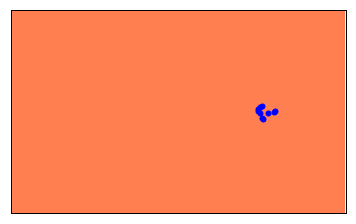

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map = Basemap(projection='merc', lat_0 = 34.3, lon_0 = -119.2,
    resolution = 'h', area_thresh = 0.01,
    llcrnrlon=-119.1, llcrnrlat=34.4,
    urcrnrlon=-119.3, urcrnrlat=34.5)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 
lons = list(df.Longitude)
lats = list(df.Latitude)
x,y = map(lons, lats)
map.plot(x, y, 'bo', markersize=5)
 
plt.show()

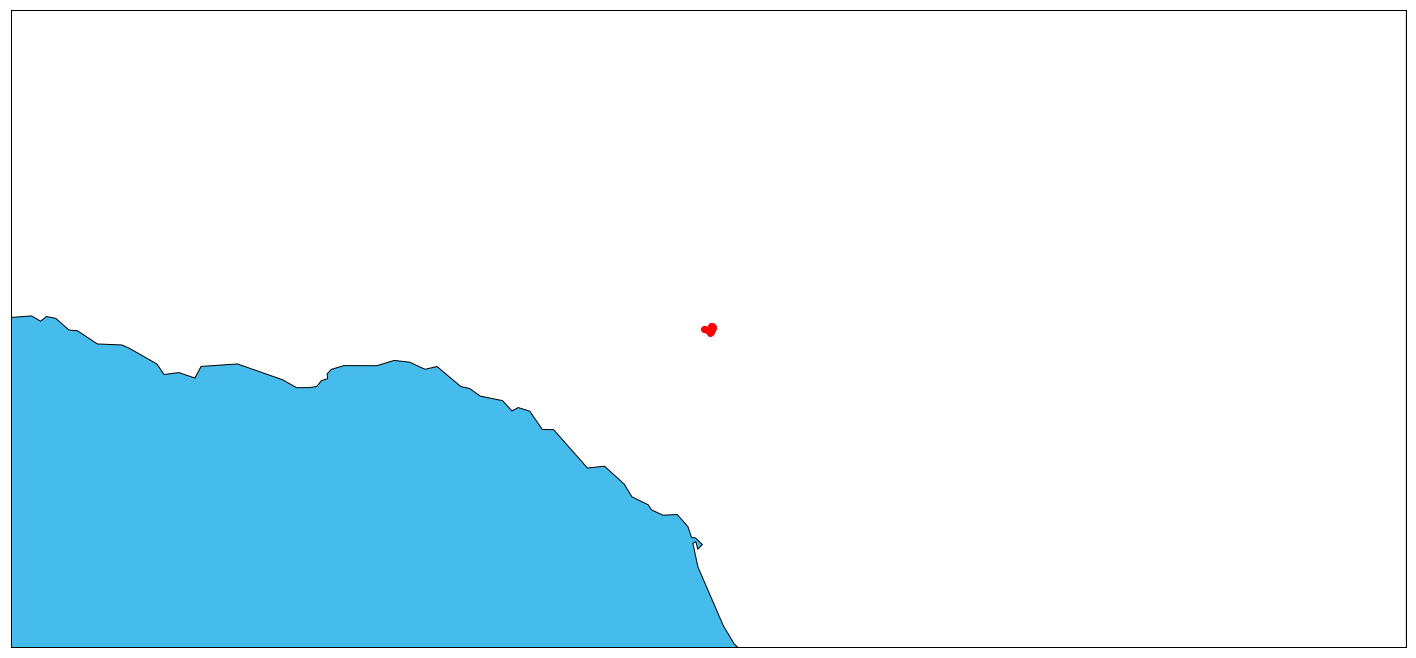

In [33]:
lat = df['Latitude'].values
lon = df['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 0.8 # buffer to add to the range
margin2=0.3
lat_min = min(lat) - margin2
lat_max = max(lat) + margin2
lon_min = min(lon) - margin
lon_max = max(lon) + margin
plt.figure(figsize=(25,25))
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5,)
plt.show()